# PM2

September 21st, 2020 <br/>Hannah Kim

## Data Exploration

Fetch stored variables from the other notebook. The list publishers contains all publishers for which article data was collected, and the dictionary articleInfo contains information about all articles for each publisher.

In [1]:
%store -r publishers
%store -r articleInfo

Import necessary modules.

In [2]:
import random
import matplotlib.pyplot as plt
import datetime
import pandas as pd
from konlpy.tag import Okt
from collections import Counter

Get number of articles for each news publisher.

In [3]:
print([p + " " + str(len(articleInfo[p])) for p in articleInfo])

['경향신문 190', '국민일보 199', '내일신문 0', '동아일보 136', '문화일보 63', '서울신문 240', '세계일보 313', '조선일보 196', '중앙일보 287', '한겨레 93', '한국일보 235']


### Clean up entries for which no information was obtained

Pop publishers for which there is no data, both from articleInfo and the list of publishers. (There were some articles from Naeil Shinmun, but there weren't Naver News links for any of the articles.)

In [4]:
emptyPublishers = []
for p in articleInfo:
    if len(articleInfo[p]) == 0:
        emptyPublishers.append(p)

for p in emptyPublishers:
    print(p, articleInfo.pop(p), 'popped')
    publishers.remove(p)

내일신문 {} popped


Get links and their news publishers for empty entries. (The specific article that is popped was completely irrelevant to the topic anyway.)

In [5]:
emptyArticles = []

for p in articleInfo:
    aLinks = articleInfo[p]
    for aLink in aLinks:
        aData = aLinks[aLink]
        if len(aData) == 0:
            emptyArticles.append((p, aLink))
            
for p, a in emptyArticles:
    print(p, a, articleInfo[p].pop(a), 'popped')

국민일보 https://sports.news.naver.com/news.nhn?oid=005&aid=0001357300 {} popped


### News publishers for which article data was obtained

In [6]:
print(publishers)
print(len(publishers))

['경향신문', '국민일보', '동아일보', '문화일보', '서울신문', '세계일보', '조선일보', '중앙일보', '한겨레', '한국일보']
10


Below is a dictionary containing the names of all news publishers in English.

In [7]:
eng = {'경향신문': 'Kyunghyang Shinmun',
       '국민일보': 'Kukmin Ilbo',
       '내일신문': 'Naeil Shinmun',
       '동아일보': 'Dong-A Ilbo',
       '문화일보': 'Munhwa Ilbo',
       '서울신문': 'Seoul Shinmun',
       '세계일보': 'Segye Ilbo',
       '조선일보': 'Chosun Ilbo',
       '중앙일보': 'JoongAng Ilbo',
       '한겨레': 'Hankyoreh',
       '한국일보': 'Hankook Ilbo'}

### Number of articles that appeared in the Naver search engine and had a Naver News link

In [8]:
total = 0
for publisher in articleInfo:
    print('{}: {} articles'.format(eng[publisher], len(articleInfo[publisher])))
    total += len(articleInfo[publisher])
print('Total: {} articles'.format(total))

Kyunghyang Shinmun: 190 articles
Kukmin Ilbo: 198 articles
Dong-A Ilbo: 136 articles
Munhwa Ilbo: 63 articles
Seoul Shinmun: 240 articles
Segye Ilbo: 313 articles
Chosun Ilbo: 196 articles
JoongAng Ilbo: 287 articles
Hankyoreh: 93 articles
Hankook Ilbo: 235 articles
Total: 1951 articles


Corresponding barplot.

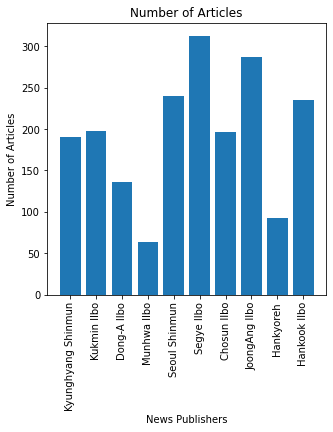

In [9]:
engNames = [eng[p] for p in publishers]

numArticles = [len(articleInfo[p]) for p in publishers]
plt.figure(figsize=(5,5))
plt.subplot()
plt.bar(engNames, numArticles)
plt.xticks(rotation=90)
plt.title('Number of Articles')
plt.xlabel('News Publishers')
plt.ylabel('Number of Articles')
plt.show()

### Types of information for each article in articleInfo

Choose a random article to show information.

In [10]:
randomArticle = random.choice(list(articleInfo['조선일보']))
randomInfoDict = articleInfo['조선일보'][randomArticle]
for key in randomInfoDict:
    print(key, randomInfoDict[key])

title 당정·의협 합의… 전공의 결정 남았다
datetime 2020-09-05 03:02:00
num_comments 52
content “의대증원·공공의대, 원점서 재논의” 파업 보름만에 협상 타결
정부·여당과 대한의사협회가 4일 의대 정원 확대와 공공의대 신설 추진을 중단하고 코로나 상황이 안정된 뒤 원점에서 재논의한다는 합의를 발표했다. 의협은 오는 7일로 예고했던 총파업을 취소했다. 무기한 파업에 들어간 전공의(인턴과 레지던트)와 전임의(레지던트를 마친 펠로)도 진료 현장에 복귀할 전망이다. 지난달 21일 정부의 의대 정원 증원, 공공의대 설립 정책 등에 반발한 전공의들의 무기한 파업으로 시작된 의료계 파업 사태가 끝나게 됐다.

최대집(왼쪽) 대한의사협회 회장과 박능후 보건복지부 장관이 4일 오후 정부서울청사에서 의대 증원과 공공 의대 신설 등을 중단하고 의정 협의체를 마련하기로 한 합의문에 서명한 뒤 악수하고 있다. /연합뉴스

정부는 이날 진료에 복귀하라는 업무개시명령에 불응한 전공의 6명에 대한 고발을 취하했다. 오는 8일 시작하는 의사 국가고시 실기시험 재(再)접수 기간도 4일 오후 6시에서 6일 자정으로 연장했다. 응시 취소 의사를 밝힌 의대 졸업반 학생 2900여 명이 불이익을 받지 않도록 한 것이다. 보건복지부는 지난달 26일 공정거래법 위반으로 의협을 공정거래위원회에 신고한 것도 취소했다. 기존의 강공(强攻) 정책을 모두 철회한 것이다.

의대 정원 확대 등 정부가 추진한 정책에 대해 “합의문에 철회한다는 표현이 들어가야 한다”고 주장했던 입장을 고수했던 의료계가 ‘추진 중단 후 원점 재논의’라는 문구로 절충하는 방안을 받아들이면서 타협이 이뤄졌다. 최대집 의협 회장은 “집단행동을 계속해 ‘철회’ 두 글자를 얻는 과정서 얻을 것과 잃을 것을 냉정하게 고민한 판단”이라고 말했다.

전공의 단체인 대한전공의협의회는 이날 의협이 정부·여당과 합의문에 서명한 뒤에도 종일 “합의 과정에서 배제됐다”고 반발했지만, 이날 밤 늦게 박지현 회장이

### Number of comments, recommenders, and reactions per news article for each publisher

Organize necessary data.

In [11]:
totalCommentsByPublisher = dict()
totalRecommendersByPublisher = dict()
totalReactionsByPublisher = dict()

for p in articleInfo:
    for a in articleInfo[p]:
        attributes = articleInfo[p][a]
        totalRecommendersByPublisher[p] = totalRecommendersByPublisher.get(p, 0) + attributes['recommends']
        totalCommentsByPublisher[p] = totalCommentsByPublisher.get(p, 0) + attributes['num_comments']
        for r in attributes['reactions']:
            totalReactionsByPublisher[p] = totalReactionsByPublisher.get(p, 0) + attributes['reactions'][r]

Average number of comments per article for each publisher.

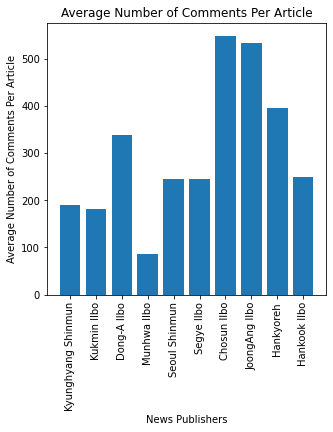

In [12]:
average_comments = [totalCommentsByPublisher[p]/len(articleInfo[p]) for p in publishers]
plt.figure(figsize=(5,5))
plt.subplot()
plt.bar(engNames, average_comments)
plt.xticks(rotation=90)
plt.title('Average Number of Comments Per Article')
plt.xlabel('News Publishers')
plt.ylabel('Average Number of Comments Per Article')
plt.show()

Average number of recommenders per article for each publisher.

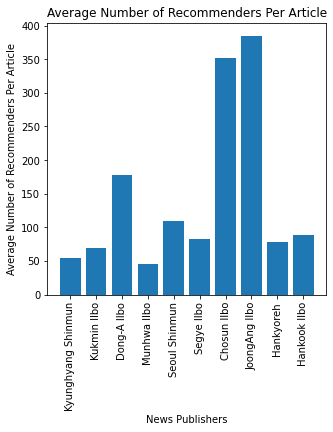

In [13]:
average_recommenders = [totalRecommendersByPublisher[p]/len(articleInfo[p]) for p in publishers]
plt.figure(figsize=(5,5))
plt.subplot()
plt.bar(engNames, average_recommenders)
plt.xticks(rotation=90)
plt.title('Average Number of Recommenders Per Article')
plt.xlabel('News Publishers')
plt.ylabel('Average Number of Recommenders Per Article')
plt.show()

Average number of reactions per article for each publisher.

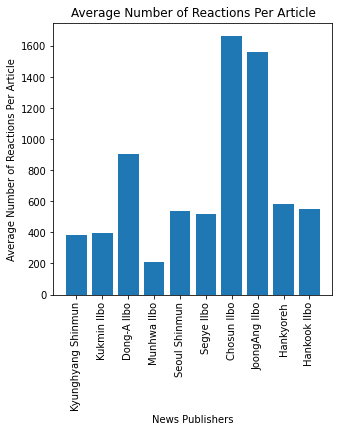

In [14]:
average_reactions = [totalReactionsByPublisher[p]/len(articleInfo[p]) for p in publishers]
plt.figure(figsize=(5,5))
plt.subplot()
plt.bar(engNames, average_reactions)
plt.xticks(rotation=90)
plt.title('Average Number of Reactions Per Article')
plt.xlabel('News Publishers')
plt.ylabel('Average Number of Reactions Per Article')
plt.show()

### Distribution of articles over time from all news publishers

Find the oldest and newest article and prepare necessary information.

In [15]:
dateTimesByPublisher = dict()

oldest = datetime.date(2020, 9, 21)
newest = datetime.date(2020, 7, 23)

for p in articleInfo:
    dateTimesByPublisher[p] = []
    for a in articleInfo[p]:
        current = articleInfo[p][a]['datetime']
        dateTimesByPublisher[p].append(current)
        current = current.date()
        oldest = current if (current < oldest) else oldest
        newest = current if (current > newest) else newest

print('The oldest article was published on {}, and the newest article was published on {}.'.format(oldest, newest))

The oldest article was published on 2020-07-23, and the newest article was published on 2020-09-21.


Create x and y values and display plot.

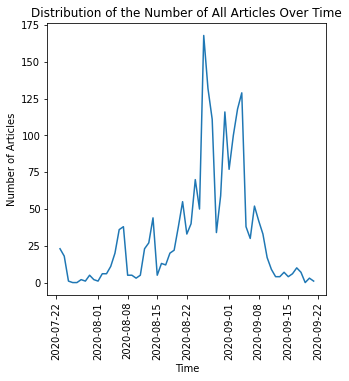

In [16]:
# values for x axis
# create list of dates within entire date range
datesList = []
newDate = oldest
while newDate <= newest:
    datesList.append(newDate)
    newDate += datetime.timedelta(days=1)

# values for y axis
numTotalDateTimesByDate = dict()
for p in dateTimesByPublisher:
    for t in dateTimesByPublisher[p]:
        date = datetime.datetime.date(t)
        numTotalDateTimesByDate[date] = numTotalDateTimesByDate.get(date, 0) + 1

plt.figure(figsize=(5,5))
plt.plot(datesList, [numTotalDateTimesByDate.get(x, 0) for x in datesList])
plt.xticks(rotation=90)
plt.title('Distribution of the Number of All Articles Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Articles')
plt.show()

### Distribution of articles over time for each news publisher

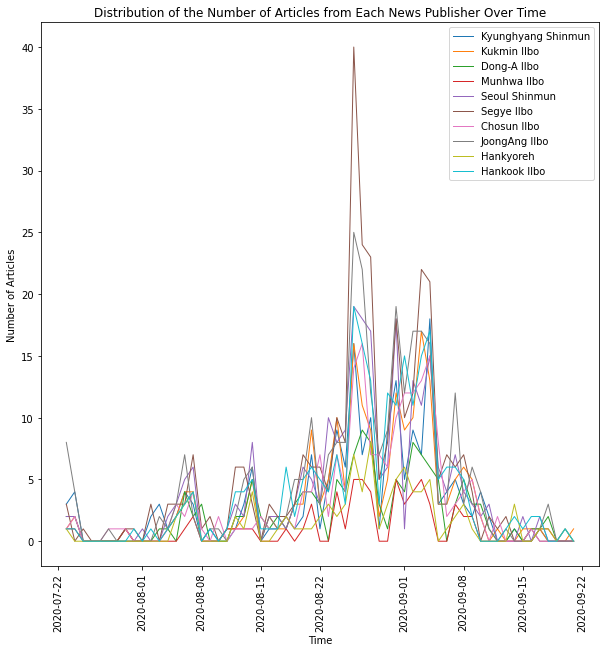

In [17]:
plt.figure(figsize=(10,10))

# dictionary containing (key, value) pairs of (publisher, list of articles for each date)
articlesPerDateByPublisher = dict()
for p in dateTimesByPublisher:
    articlesPerDateByPublisher[p] = dict()
    listOfDates = [x.date() for x in dateTimesByPublisher[p]]
    for date in listOfDates:
        articlesPerDateByPublisher[p][date] = articlesPerDateByPublisher[p].get(date, 0) + 1

# plot a line for each publisher
for p in publishers:
    plt.plot(datesList, [articlesPerDateByPublisher[p].get(x, 0) for x in datesList], label=eng[p], linewidth=1)

plt.legend()
plt.xticks(rotation=90)
plt.title('Distribution of the Number of Articles from Each News Publisher Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Articles')
plt.show()

### The most frequent words

I will use konlpy, which is a module for natural language processing of the Korean language, and the Okt class within, for this task. [This spreadsheet](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit?usp=sharing) contains all available tags; I will filter the list so that it only contains nouns, because Korean verbs tend to be composed of noun+verb form, without any space between them, and the verb often corresponds to 'do' in English. I will also filter the list for words that are only one syllable because they tend to mean things like 'thing', 'etc.', 'this', 'that', 'more', and various conjunctions.

In [18]:
okt = Okt()

nounFreqsForEachPublisher = dict()

for p in publishers:
    nounFreqsForEachPublisher[p] = Counter()
    articles = articleInfo[p]
    for a in articles:
        content = articles[a]['content']
        nounFreqs = [w for w in okt.nouns(content) if len(w) > 1]
        nounFreqsForEachPublisher[p].update(nounFreqs) # Store frequencies of nouns

Get the most frequent words in articles by all publishers.

In [19]:
allNounsCounter = Counter()
for p in nounFreqsForEachPublisher:
    allNounsCounter.update(nounFreqsForEachPublisher[p])

all_most_common = allNounsCounter.most_common(100)
print(all_most_common)

[('의료', 11511), ('의사', 9655), ('정부', 9137), ('의대', 6510), ('파업', 6192), ('병원', 5415), ('의협', 5277), ('전공', 4537), ('정책', 4388), ('코로나', 4026), ('집단', 3874), ('진료', 3781), ('정원', 3167), ('환자', 3074), ('서울', 3015), ('국민', 2919), ('확대', 2533), ('대통령', 2527), ('기자', 2445), ('업무', 2365), ('상황', 2332), ('지역', 1961), ('대한의사협회', 1921), ('논의', 1878), ('총파업', 1830), ('대해', 1745), ('교수', 1685), ('의원', 1681), ('전국', 1657), ('지난', 1649), ('합의', 1641), ('협의', 1556), ('중단', 1527), ('대한', 1527), ('라며', 1499), ('회장', 1488), ('문제', 1482), ('오전', 1479), ('명령', 1471), ('간호사', 1462), ('반대', 1449), ('현장', 1447), ('보건복지부', 1445), ('관련', 1439), ('금지', 1428), ('무단', 1371), ('배포', 1346), ('입장', 1340), ('추진', 1314), ('복귀', 1270), ('대화', 1254), ('위해', 1247), ('행동', 1242), ('참여', 1238), ('거부', 1237), ('오후', 1231), ('철회', 1229), ('복지부', 1211), ('의회', 1208), ('의과대학', 1191), ('대전', 1185), ('대책', 1176), ('단체', 1167), ('시험', 1140), ('통해', 1132), ('인력', 1116), ('사회', 1082), ('수술', 1075), ('반발', 1073), ('민주당', 1067), ('보

Translation for the 15 most frequent words.

In [20]:
translate = {'의료': 'medical',
             '의사': 'doctor',
             '정부': 'government',
             '의대': 'medical school',
             '파업': 'strike',
             '병원': 'hospital',
             '의협': 'Korean Medical Association',
             '전공': 'resident',
             '정책': 'policy',
             '코로나': 'corona',
             '집단': 'collective',
             '진료': 'doctor\'s appointment',
             '정원': 'quota',
             '환자': 'patient',
             '서울': 'Seoul'}

In [21]:
print(["{}: {}".format(translate.get(w[0], w[0]), w[1]) for w in all_most_common][:15])

['medical: 11511', 'doctor: 9655', 'government: 9137', 'medical school: 6510', 'strike: 6192', 'hospital: 5415', 'Korean Medical Association: 5277', 'resident: 4537', 'policy: 4388', 'corona: 4026', 'collective: 3874', "doctor's appointment: 3781", 'quota: 3167', 'patient: 3074', 'Seoul: 3015']


The 5 most frequent words for each publisher.

In [22]:
for p in nounFreqsForEachPublisher:
    print("{}: {}".format(p, [translate.get(w[0], w[0]) for w in nounFreqsForEachPublisher[p].most_common(5)]))

경향신문: ['medical', 'doctor', 'government', 'strike', 'medical school']
국민일보: ['medical', 'doctor', 'government', 'medical school', 'strike']
동아일보: ['medical', 'government', 'doctor', 'strike', 'hospital']
문화일보: ['medical', 'doctor', 'government', 'medical school', 'strike']
서울신문: ['medical', 'doctor', 'government', 'medical school', 'strike']
세계일보: ['medical', 'government', 'doctor', 'medical school', 'Korean Medical Association']
조선일보: ['medical', 'doctor', 'government', 'strike', 'medical school']
중앙일보: ['medical', 'doctor', 'government', 'medical school', 'strike']
한겨레: ['doctor', 'medical', 'government', 'collective', 'medical school']
한국일보: ['medical', 'government', 'doctor', 'strike', 'medical school']


The next 10 most frequent words for each publisher.

In [23]:
for p in nounFreqsForEachPublisher:
    print("{}: {}".format(p, [translate.get(w[0], w[0]) for w in nounFreqsForEachPublisher[p].most_common(15)[5:]]))

경향신문: ['hospital', 'Korean Medical Association', '경향신문', 'corona', 'policy', "doctor's appointment", 'resident', 'patient', 'collective', '기자']
국민일보: ['Korean Medical Association', 'hospital', 'resident', 'corona', 'policy', "doctor's appointment", 'collective', 'patient', 'quota', '대통령']
동아일보: ['medical school', 'Korean Medical Association', '국민', 'corona', 'policy', "doctor's appointment", 'resident', 'collective', '대통령', 'quota']
문화일보: ['문화', 'hospital', '일보', 'Korean Medical Association', 'corona', 'policy', 'patient', 'resident', 'quota', "doctor's appointment"]
서울신문: ['Korean Medical Association', 'hospital', 'Seoul', 'resident', 'policy', "doctor's appointment", 'collective', 'quota', 'corona', 'patient']
세계일보: ['strike', 'hospital', 'resident', 'collective', 'corona', 'policy', "doctor's appointment", '국민', '대통령', 'quota']
조선일보: ['resident', 'Korean Medical Association', 'corona', 'policy', 'hospital', '대통령', '국민', 'quota', "doctor's appointment", '기자']
중앙일보: ['hospital', 'poli

### One article of random choice from each news publisher

In [24]:
for p in articleInfo:
    articleLink = random.choice(list(articleInfo[p]))
    print("Random article from {}: {}".format(p, articleLink))

Random article from 경향신문: https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=032&aid=0003028381
Random article from 국민일보: https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=005&aid=0001360517
Random article from 동아일보: https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=020&aid=0003305929
Random article from 문화일보: https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=021&aid=0002440274
Random article from 서울신문: https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=081&aid=0003119843
Random article from 세계일보: https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=022&aid=0003493443
Random article from 조선일보: https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=023&aid=0003559261
Random article from 중앙일보: https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=025&aid=0003028178
Random article from 한겨레: https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=028&aid=0002

In [26]:
publishersT = publishers
articleInfoT = articleInfo

%store publishersT
%store articleInfoT

Stored 'publishersT' (list)
Stored 'articleInfoT' (dict)
